In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot 
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('SBAnational.csv')

df=df.drop(columns=['LoanNr_ChkDgt','Name','City','State','Zip','RevLineCr','Bank','BankState','ChgOffDate','ChgOffPrinGr','ApprovalDate','DisbursementDate','ApprovalFY','BalanceGross'],axis=1)
df=df.dropna()#check null data
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
0,451120,84,4,2.0,0,0,1,0,Y,"$60,000.00",P I F,"$60,000.00","$48,000.00"
1,722410,60,2,2.0,0,0,1,0,Y,"$40,000.00",P I F,"$40,000.00","$32,000.00"
2,621210,180,7,1.0,0,0,1,0,N,"$287,000.00",P I F,"$287,000.00","$215,250.00"
3,0,60,2,1.0,0,0,1,0,Y,"$35,000.00",P I F,"$35,000.00","$28,000.00"
4,0,240,14,1.0,7,7,1,0,N,"$229,000.00",P I F,"$229,000.00","$229,000.00"


In [3]:
df['Defaulted'] = [-1 if app == 'CHGOFF' else 1 for app in df.MIS_Status.values]
df['LowDoc'] = [-1 if app == 'N' else 1 for app in df.LowDoc.values]
df = df.drop(columns=['MIS_Status'])
df

money_cols = ['DisbursementGross', 'GrAppv', 'SBA_Appv']
for col in money_cols:
    df[col] = df[col].str.replace('$',' ') 
    df[col] =[float(val[1:].replace(',', '')) for val in df[col].values]
df

<ipython-input-3-cc4b2a7d0b71>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$',' ')


,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,GrAppv,SBA_Appv,Defaulted
0,451120,84,4,2.0,0,0,1,0,1,60000.0,60000.0,48000.0,1
1,722410,60,2,2.0,0,0,1,0,1,40000.0,40000.0,32000.0,1
2,621210,180,7,1.0,0,0,1,0,-1,287000.0,287000.0,215250.0,1
3,0,60,2,1.0,0,0,1,0,1,35000.0,35000.0,28000.0,1
4,0,240,14,1.0,7,7,1,0,-1,229000.0,229000.0,229000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,451120,60,6,1.0,0,0,1,0,-1,70000.0,70000.0,56000.0,1
899160,451130,60,6,1.0,0,0,1,0,-1,85000.0,85000.0,42500.0,1
899161,332321,108,26,1.0,0,0,1,0,-1,300000.0,300000.0,225000.0,1
899162,0,60,6,1.0,0,0,1,0,1,75000.0,75000.0,60000.0,-1


In [5]:
X=df.drop(columns=['Defaulted'])

y=df.Defaulted

df.head(20)

print(X)
print(y)

         NAICS  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
0       451120    84      4       2.0          0            0              1   
1       722410    60      2       2.0          0            0              1   
2       621210   180      7       1.0          0            0              1   
3            0    60      2       1.0          0            0              1   
4            0   240     14       1.0          7            7              1   
...        ...   ...    ...       ...        ...          ...            ...   
899159  451120    60      6       1.0          0            0              1   
899160  451130    60      6       1.0          0            0              1   
899161  332321   108     26       1.0          0            0              1   
899162       0    60      6       1.0          0            0              1   
899163       0    48      1       2.0          0            0              1   

        UrbanRural  LowDoc  Disbursemen

In [6]:
X_train, X_test, y_train , y_test =train_test_split(X, y, test_size=0.7)

In [7]:
X_train.head()

,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,GrAppv,SBA_Appv
616894,423450,25,1,1.0,2,1,1,0,-1,10000.0,10000.0,8500.0
890085,0,240,5,1.0,0,0,1,0,-1,300000.0,300000.0,225000.0
521470,441110,120,1,2.0,28,1,0,2,-1,500000.0,500000.0,375000.0
878693,448310,84,7,1.0,0,0,1,0,1,88000.0,88000.0,70400.0
90765,0,88,5,1.0,0,0,0,0,-1,150000.0,150000.0,135000.0


In [8]:
y_train.head()

616894   -1
890085    1
521470    1
878693    1
90765    -1
Name: Defaulted, dtype: int64

In [9]:
#model training
#higher epochs will oftn result in more accurate model
#model.fit(X_train,y_train,epochs=200,batch_size=32)
#improving Accuracy try training for 500 epochs, we should see the accuray
rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(y_pred)

[-1.   1.  -0.2 ...  1.   1.   1. ]


In [10]:
y_pred=[0 if val <0.5 else 1 for val in y_pred]

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred )

0.7570645290606768

In [12]:
features_list=list(X.columns)
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = features_list, rounded = True, precision = 1, filled = True)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


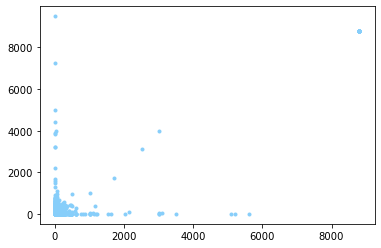

In [4]:
import matplotlib.pyplot as plt
plt.plot(df['CreateJob'],df['RetainedJob'], 'o', markersize = 3, color = 'lightskyblue')
plt.show()

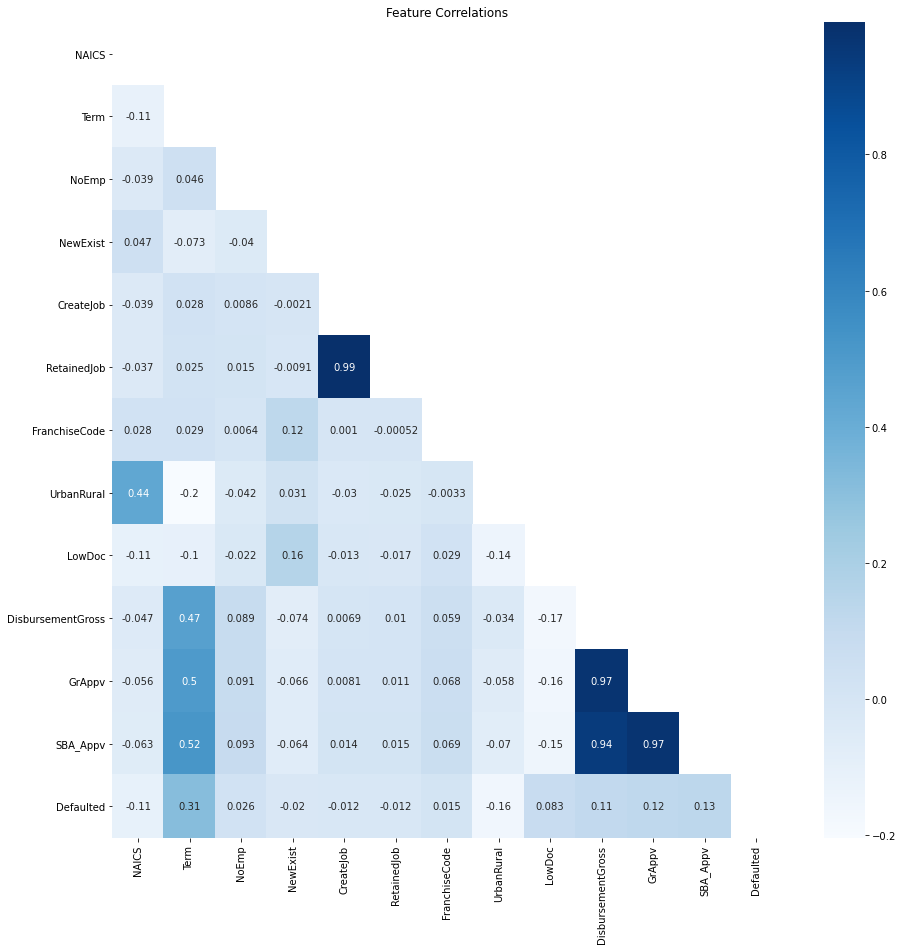

In [18]:
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, ax=ax, mask=mask, cmap = "Blues").set(title='Feature Correlations')
plt.show()
#Term and DisbursementGross have a strong positive correlation (.47), which means that loans with larger terms are usually large.
#positive realiotnship between Retainedjob and Creatjob.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


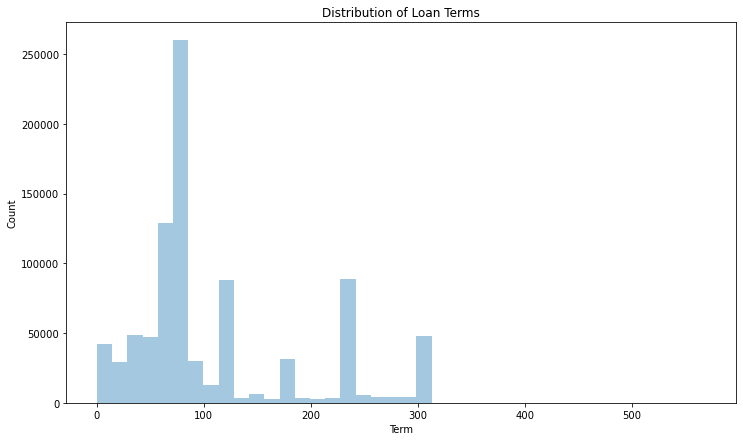

In [19]:
#The distribution of loan terms isn't quite normal, so we might want to consider scaling it later.
#There seems to be popular loan terms around the 100, 250 and 300 month marks.
fig = plt.figure(figsize=(12,7))
sns.distplot(a=df['Term'], bins = 40,kde=False)
plt.title('Distribution of Loan Terms')
plt.ylabel('Count')
plt.show()